In [1]:
rm(list= ls())
ls()

character(0)

In [2]:
.libPaths(c( "/hsfscqjf2/ST_CQ/Reference/software/envs/cellchat/lib/R/library/",
"/hsfscqjf2/ST_CQ/Reference/software/envs/monocle2/lib/R/library/")
)

In [21]:
#cellchat envs
suppressPackageStartupMessages({
library(dplyr)
library(monocle,lib.loc="/hsfscqjf2/ST_CQ/Reference/software/envs/monocle2/lib/R/library")

library(Seurat)
library(magrittr,lib.loc="/hsfscqjf2/ST_CQ/Reference/software/envs/monocle3/lib/R/library")
library(ggsci)
library(scales)
library(RColorBrewer)
library(Cairo)})

# load learn graph

In [23]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/6_trajectory/monocle2/cell_morphogenesis/"
figuredir=resultdir
setwd(resultdir)

In [12]:
pal_celltype<-c("Cell_morphogenesis"='#1f77b4',
  "Epithelial_1"='#279e68',
        "Epithelial_2"='#98df8a',
       "Epithelial_3"='#b5bd61',
"Cuticle_1"='#d62728',
 "Cuticle_2"='#e377c2',
 "Cuticle_3"='#ff9896')
pal_timepoint<-c("L5D1"="#EEE8DA",
                 "L5D2"="#BFE2E3",
                 "L5D3"="#A1CFFA",
                 "L5D4"="#A0BFAF",
                 "L5D5"="#78BDAD",
                 "L5D6"="#397A7F",
                 "L5D7"="#1F5392",
                 "WD1"="#F0918E",
                 "WD2"="#D45651",
                 "P6"="#AE98D6")
orders<-c("Cell_morphogenesis",
  "Epithelial_1",
        "Epithelial_2",
       "Epithelial_3",
"Cuticle_1",
 "Cuticle_2",
 "Cuticle_3")

In [25]:
load(file=paste0(resultdir,"cds_root_state3.Rdata"))

In [26]:
cds

CellDataSet (storageMode: environment)
assayData: 16122 features, 6665 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CELL19_N1_1 CELL21_N3_1 ... CELL17886_N1_11 (6665 total)
  varLabels: seq_folder nUMI ... State (24 total)
  varMetadata: labelDescription
featureData
  featureNames: LOC101739615 LOC101740159 ... LOC119631155 (16122
    total)
  fvarLabels: gene_short_name use_for_ordering
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [12]:
Pseudotime_cm<-cds@phenoData@data
head(Pseudotime_cm)
write.csv(Pseudotime_cm,file="Pseudotime_cm.csv")

,seq_folder,nUMI,nGene,doublet_info,library,log10GenesPerUMI,mitoRatio,cells,sample,batch,⋯,leiden_res0.5,leiden_res0.6,leiden_res0.8,leiden_res1,cluster,seurat_clusters,celltype_v1,Size_Factor,Pseudotime,State
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
CELL19_N1_1,P6_2,1891,517,Singlet,P6_2,0.8281190,0,CELL19_N1_1,P6_2,1,⋯,6,7,5,14,5,5,Cuticle_3,0.3416790,35.56532,1
CELL21_N3_1,P6_2,18377,4087,Singlet,P6_2,0.8468978,0,CELL21_N3_1,P6_2,1,⋯,6,7,5,8,5,5,Cuticle_3,3.3204834,36.79414,1
CELL24_N1_1,P6_2,1339,820,Singlet,P6_2,0.9318895,0,CELL24_N1_1,P6_2,1,⋯,6,7,5,8,5,5,Cuticle_3,0.2419398,35.47276,1
CELL71_N2_1,P6_2,7642,2499,Singlet,P6_2,0.8749897,0,CELL71_N2_1,P6_2,1,⋯,6,7,5,14,5,5,Cuticle_3,1.3808094,36.03834,1
CELL96_N1_1,P6_2,4454,1552,Singlet,P6_2,0.8745163,0,CELL96_N1_1,P6_2,1,⋯,10,11,14,16,8,8,Cuticle_2,0.8047795,22.84794,1
CELL98_N1_1,P6_2,1535,830,Singlet,P6_2,0.9161892,0,CELL98_N1_1,P6_2,1,⋯,6,7,5,8,5,5,Cuticle_3,0.2773544,35.80176,1


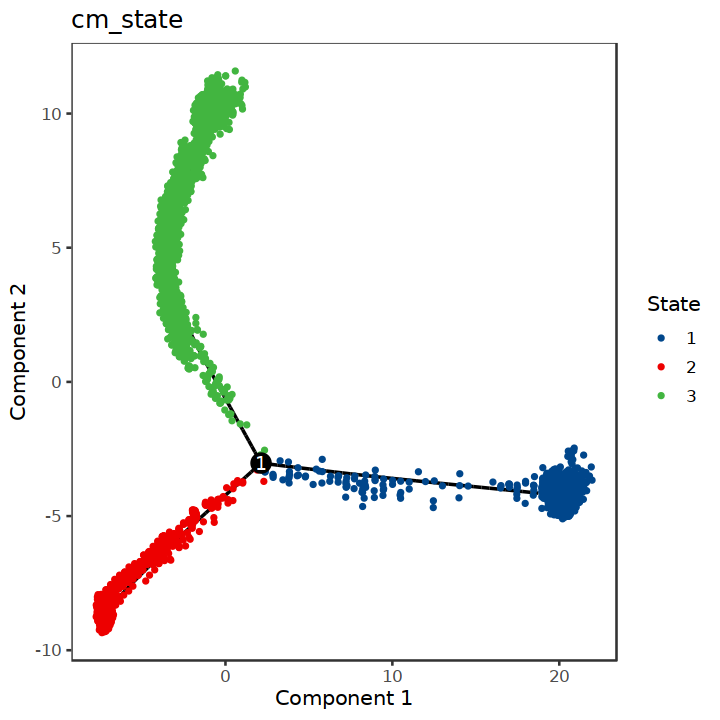

In [27]:
state_pal<-pal_lancet()(5)
height=6
width=6
options(repr.plot.width = width, repr.plot.height=height)
p<-print(plot_cell_trajectory(cds,color_by="State",
  #                                  x = 2,
  # y = 1,
                              cell_size=1,show_backbone = TRUE)+
         scale_color_manual(values=state_pal)+
theme(legend.position = "right")+
  theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     theme_bw(base_size=12)+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      ggtitle("cm_state"))
# ggsave(p, filename="cm_State_trajectory.pdf", path=figuredir,width = width,height = height)



   1    2    3 
1134 2191 3340 

Warning message in geom_bar(aes(width = 0.3)):
“Ignoring unknown aesthetics: width”


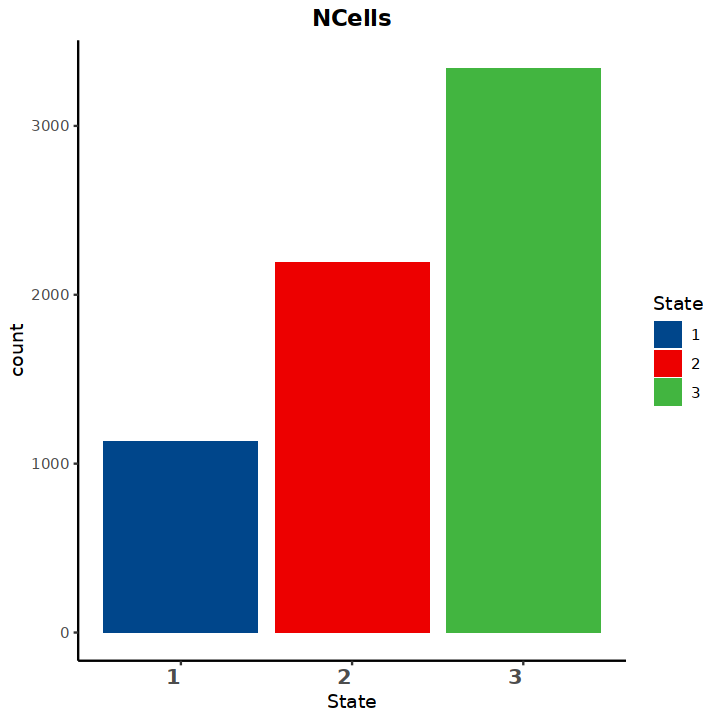

In [11]:
table(cds@phenoData@data$State)

data<-cds@phenoData@data

height=6
width=6
options(repr.plot.width = width, repr.plot.height=height)
p5<-print(data %>%      
       ggplot(aes(x=State, fill=State)) +
      geom_bar(aes(width = 0.3)) +
scale_fill_manual(values=state_pal)+
      theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells"))

# ggsave(p5, filename="state_all.pdf", path=figuredir,width = width,height = height)

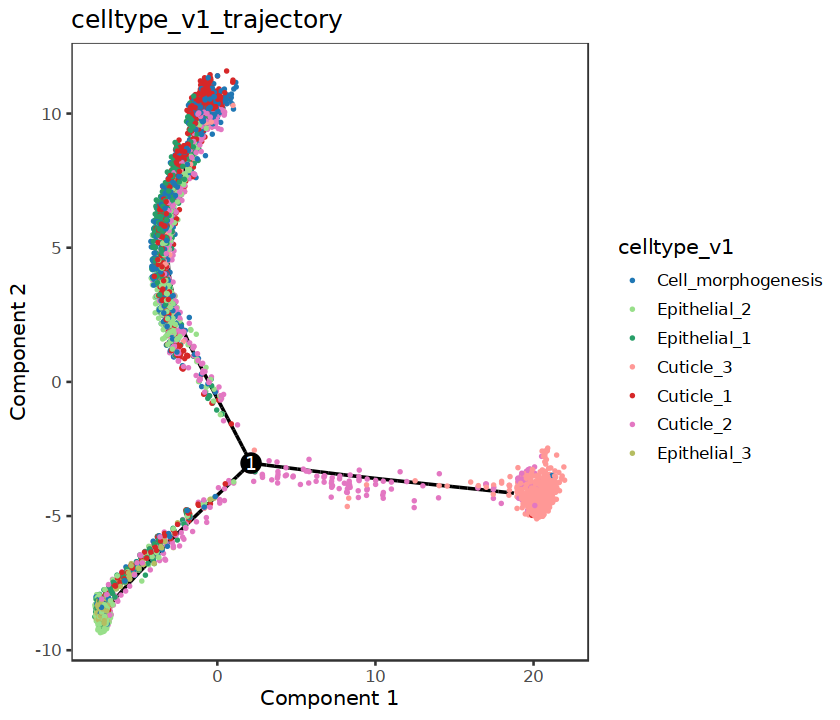

In [12]:
height=6
width=7
options(repr.plot.width = width, repr.plot.height=height)
p<-print(plot_cell_trajectory(cds,color_by="celltype_v1",
                              cell_size=0.5,show_backbone = TRUE)+
         scale_color_manual(values=pal_celltype)+
theme(legend.position = "right")+
  theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     theme_bw(base_size=12)+
         theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      ggtitle("celltype_v1_trajectory"))
# ggsave(p, filename="celltype_v1_trajectory.pdf", path=figuredir,width = width,height = height)

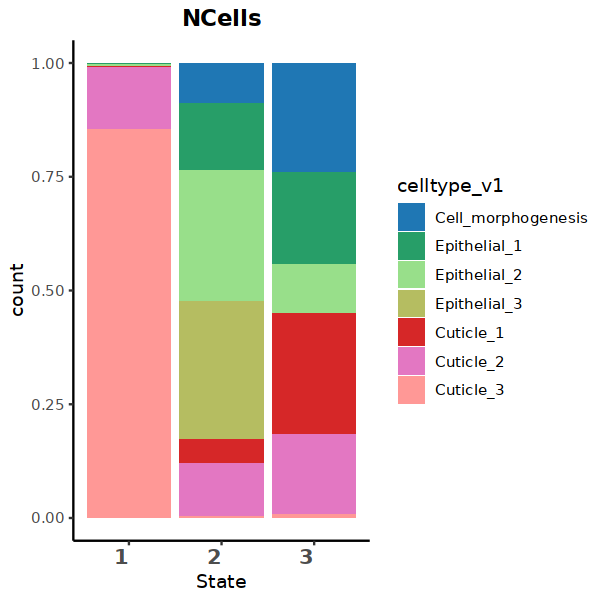

In [13]:
data<-cds@phenoData@data
data$celltype_v1<-factor(data$celltype_v1,levels = orders)

height=5
width=5
options(repr.plot.width = width, repr.plot.height=height)
p5<-print(data %>%      
       ggplot(aes(x=State, fill=celltype_v1)) +
      geom_bar(aes(fill = celltype_v1), 
                   position = 'fill') +
scale_fill_manual(values=pal_celltype)+
      theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
      ggtitle("NCells"))

# ggsave(p5, filename="state_ncells.pdf", path=figuredir,width = width,height = height)

In [14]:
# width

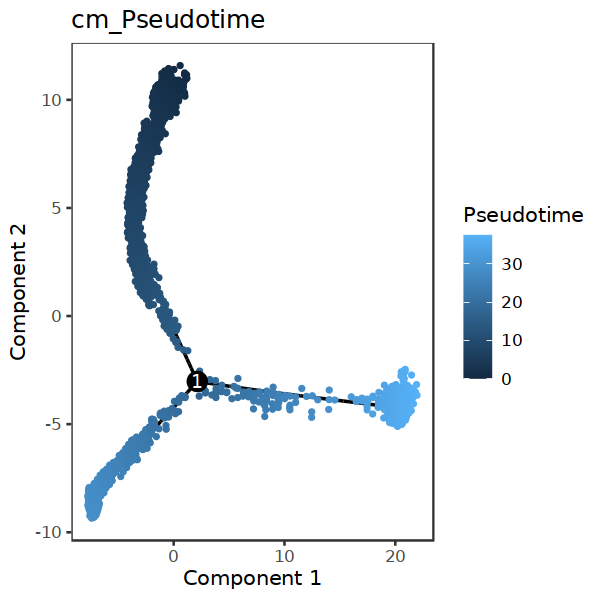

In [15]:
height=5
width=5
options(repr.plot.width = width, repr.plot.height=height)
options(repr.plot.width = width, repr.plot.height=height)
p<-print(plot_cell_trajectory(cds,color_by="Pseudotime",cell_size=1,show_backbone = TRUE)+
  theme(legend.position = "right")+
  # theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     theme_bw(base_size=12)+ theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      ggtitle("cm_Pseudotime"))
# ggsave(p, filename="cm_Pseudotime_trajectory.pdf", path=figuredir,width = width,height = height)

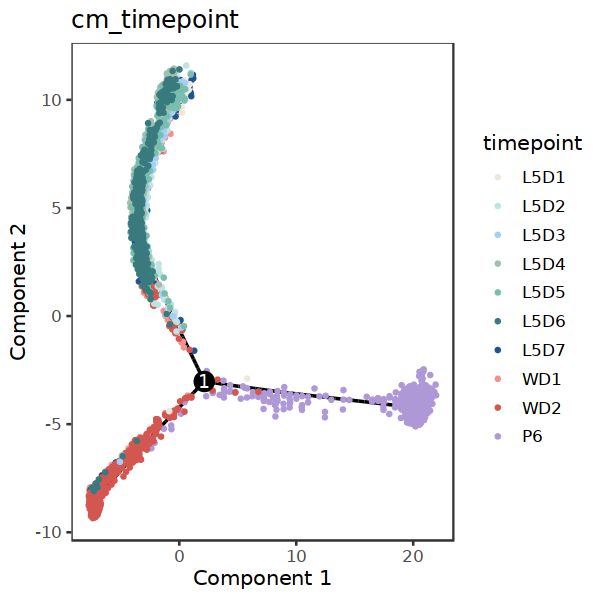

In [16]:
height=5
width=5
options(repr.plot.width = width, repr.plot.height=height)
p<-print(plot_cell_trajectory(cds,color_by="timepoint",cell_size=0.8,show_backbone = TRUE)+
  theme(legend.position = "right")+
        scale_color_manual(values = pal_timepoint)+
  # theme_classic() +
      theme(axis.text.x = element_text(vjust = 1, hjust=1,size = 12,face="bold")) +
      theme(plot.title = element_text(hjust=0.5, face="bold")) +
     theme_bw(base_size=12)+
          theme(panel.grid.major=element_line(colour=NA),
            panel.background = element_rect(fill = "transparent",colour = NA),
            plot.background = element_rect(fill = "transparent",colour = NA),
            panel.grid.minor = element_blank())+
      ggtitle("cm_timepoint"))
# ggsave(p, filename="cm_timepoint_trajectory.pdf", path=figuredir,width = width,height = height)

In [25]:
BEAM_res=BEAM(cds,cores = 1,progenitor_method = "duplicate")
#会返回每个基因的显著性，显著的基因就是那些随不同branch变化的基因
#这一步很慢
BEAM_res=BEAM_res[,c("gene_short_name","pval","qval")]
saveRDS(BEAM_res, file = "BEAM_res.rds")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.2 GiB”


# heatmap branch

In [1]:
rm(list= ls())
ls()

character(0)

In [3]:
library(dplyr)
library(igraph,lib.loc="/hsfscqjf2/ST_CQ/Reference/software/envs/monocle3/lib/R/library")
library(monocle,lib.loc="/hsfscqjf2/ST_CQ/Reference/software/envs/monocle2/lib/R/library")
library(RColorBrewer)

In [4]:
resultdir<-"/hsfscqjf1/ST_CQ/P24Z32300N0020/hemingmin/bom/10.sc_merged1/results/6_trajectory/monocle2/cell_morphogenesis/"
figuredir=resultdir
setwd(resultdir)

In [5]:
load(file=paste0(resultdir,"cds_root_state3.Rdata"))
BEAM_res<-readRDS(file = "BEAM_res.rds")
marker<-read.csv(file="find_marker_deg.csv",header = T)

In [6]:
# library(dplyr)
top15 <- marker %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
top15_ordergene <- BEAM_res[top15$gene, ]
Time_genes <- top15_ordergene %>% pull(gene_short_name) %>% as.character()
Time_genes <- unique(Time_genes)

In [7]:
length(unique(Time_genes))

[1] 68

In [8]:
# genes
top50<- marker %>% group_by(cluster) %>% top_n(n = 50, wt = avg_log2FC)

genes<-intersect(cds@featureData@data$gene_short_name , top50$gene)
length(genes)

[1] 323

In [9]:
cds

CellDataSet (storageMode: environment)
assayData: 16122 features, 6665 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: CELL19_N1_1 CELL21_N3_1 ... CELL17886_N1_11 (6665 total)
  varLabels: seq_folder nUMI ... State (24 total)
  varMetadata: labelDescription
featureData
  featureNames: LOC101739615 LOC101740159 ... LOC119631155 (16122
    total)
  fvarLabels: gene_short_name use_for_ordering
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

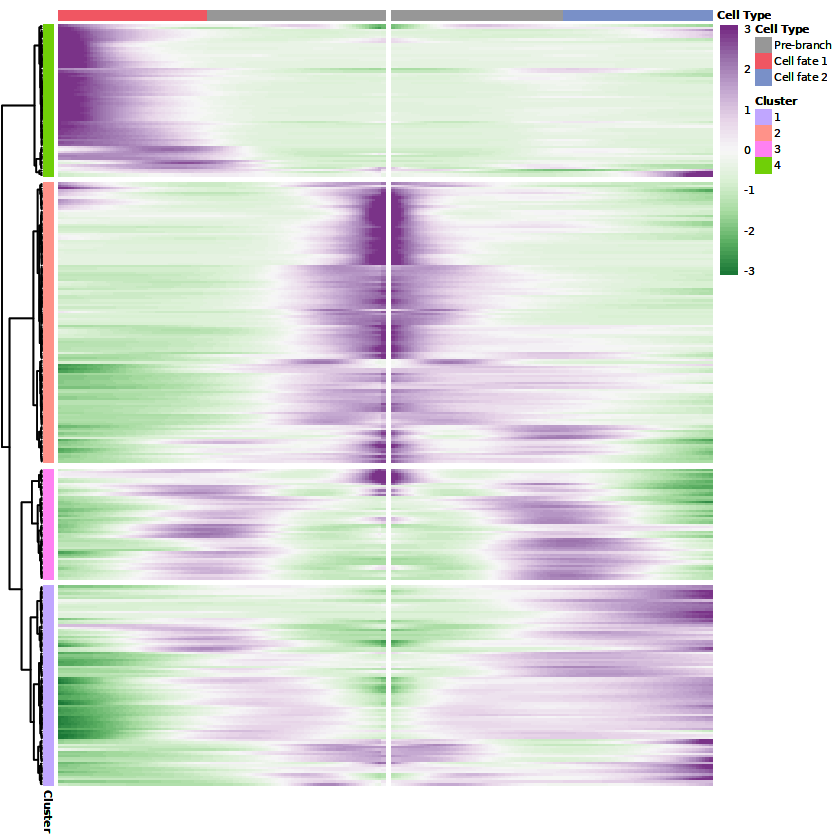

In [10]:
#Cell fate 1 corresponds to the state with small id while cell fate 2 corresponds to state with bigger id
tmp1=plot_genes_branched_heatmap(cds[genes,],
                                 branch_point = 1,
                                 num_clusters = 4, 
                                 cores = 1,
                                 branch_labels = c("Cell fate 1", "Cell fate 2"),
                                 #hmcols = NULL, 
                                 hmcols = colorRampPalette(rev(brewer.pal(9, "PRGn")))(62),
                                 branch_colors = c("#979797", "#F05662", "#7990C8"), #pre-branch, Cell fate 1, Cell fate 2分别用什么颜色
                                 use_gene_short_name = T,
                                 show_rownames = F,
                                 return_heatmap = T 
)

# pdf("branched_heatmap.pdf",width = 5,height = 6)
tmp1$ph_res
# dev.off()

In [45]:
save(tmp1,file = 'branched.Rdata')

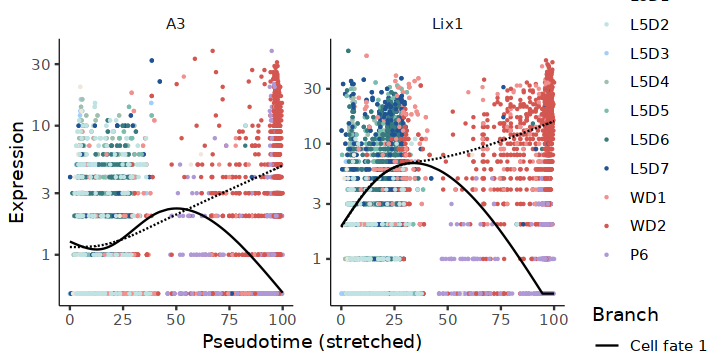

In [13]:
height=3
width=6
options(repr.plot.width = width, repr.plot.height=height)

target_genes=c("Lix1","A3")

p<-plot_genes_branched_pseudotime(cds[target_genes,],
                               branch_point = 1,
                               branch_labels = c("Cell fate 1", "Cell fate 2"),
                               color_by = "timepoint",
                               cell_size=0.2,
                               ncol = 2)+
scale_color_manual(values =pal_timepoint)
# pdf("Hippo_preudotime_pathway.pdf",width = width,height = height)
print(p)
# dev.off()